### Deliverable 1: Preprocessing the Data for a Neural Network

In [70]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [71]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN","NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [72]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [73]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

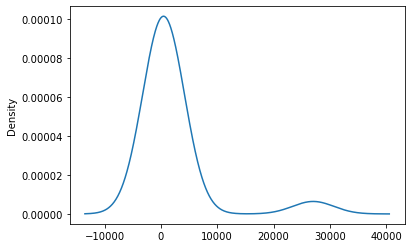

In [74]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [75]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type[application_type < 1000].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [76]:
# Look at CLASSIFICATION value counts for binning
classification_value = application_df['CLASSIFICATION'].value_counts()
classification_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

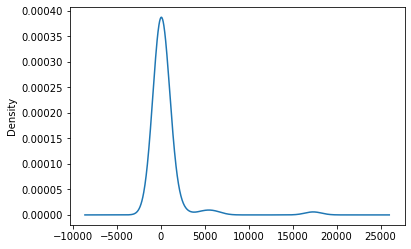

In [77]:
# Visualize the value counts of CLASSIFICATION
classification_value.plot.density()

In [78]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_value[classification_value < 2000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [79]:
# Generate our categorical variable lists
categorical_app = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
categorical_app

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [80]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[categorical_app]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(categorical_app)
encode_df.head()

C:\Users\ckrac\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [81]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True,right_index=True)
application_df = application_df.drop(columns = categorical_app)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop(['IS_SUCCESSFUL'],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\ckrac\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [84]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 80)                3120      
                                                                 
 dense_10 (Dense)            (None, 30)                2430      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,581
Trainable params: 5,581
Non-trainable params: 0
_________________________________________________________________


In [85]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [87]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("../Resources/",exist_ok=True)
checkpoint_path = "../Resources/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=10)

# Train the model
fit_model = nn.fit(X_train,y_train,epochs=30,callbacks=[cp_callback])

Epoch 1/30
  1/804 [..............................] - ETA: 11:35 - loss: 752.0082 - accuracy: 0.5938
Epoch 1: saving model to ../Resources\weights.01.hdf5
 10/804 [..............................] - ETA: 4s - loss: 1698.8838 - accuracy: 0.5125  
Epoch 1: saving model to ../Resources\weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 2853.5151 - accuracy: 0.5000
Epoch 1: saving model to ../Resources\weights.01.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 1991.7471 - accuracy: 0.5282
Epoch 1: saving model to ../Resources\weights.01.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 9600.7207 - accuracy: 0.5355
Epoch 1: saving model to ../Resources\weights.01.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 8658.1357 - accuracy: 0.5296
Epoch 1: saving model to ../Resources\weights.01.hdf5
 67/804 [=>............................] - ETA: 3s - loss: 8655.4512 - accuracy: 0.5322
Epoch 1: saving model to ../Resources\weights

580/804 [====================>.........] - ETA: 1s - loss: 92907.0547 - accuracy: 0.4936
Epoch 1: saving model to ../Resources\weights.01.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 96605.8594 - accuracy: 0.4942
Epoch 1: saving model to ../Resources\weights.01.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 95334.8906 - accuracy: 0.4945
Epoch 1: saving model to ../Resources\weights.01.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 93775.5000 - accuracy: 0.4956
Epoch 1: saving model to ../Resources\weights.01.hdf5
621/804 [======================>.......] - ETA: 1s - loss: 93493.6875 - accuracy: 0.4962
Epoch 1: saving model to ../Resources\weights.01.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 92184.5234 - accuracy: 0.4976
Epoch 1: saving model to ../Resources\weights.01.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 90748.3516 - accuracy: 0.4969
Epoch 1: saving model to ../Resources\weights.01.hdf5

346/804 [===========>..................] - ETA: 2s - loss: 13556.2080 - accuracy: 0.4697
Epoch 2: saving model to ../Resources\weights.02.hdf5
356/804 [============>.................] - ETA: 2s - loss: 13588.9492 - accuracy: 0.4713
Epoch 2: saving model to ../Resources\weights.02.hdf5
366/804 [============>.................] - ETA: 2s - loss: 17162.9277 - accuracy: 0.4735
Epoch 2: saving model to ../Resources\weights.02.hdf5
376/804 [=============>................] - ETA: 2s - loss: 16917.2422 - accuracy: 0.4754
Epoch 2: saving model to ../Resources\weights.02.hdf5
386/804 [=============>................] - ETA: 2s - loss: 19106.0664 - accuracy: 0.4760
Epoch 2: saving model to ../Resources\weights.02.hdf5
396/804 [=============>................] - ETA: 2s - loss: 18708.9629 - accuracy: 0.4770
Epoch 2: saving model to ../Resources\weights.02.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 18638.7773 - accuracy: 0.4781
Epoch 2: saving model to ../Resources\weights.02.hdf5

112/804 [===>..........................] - ETA: 4s - loss: 1041.3937 - accuracy: 0.4771
Epoch 3: saving model to ../Resources\weights.03.hdf5
122/804 [===>..........................] - ETA: 4s - loss: 2173.4221 - accuracy: 0.4800
Epoch 3: saving model to ../Resources\weights.03.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 2189.3123 - accuracy: 0.4848
Epoch 3: saving model to ../Resources\weights.03.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 4047.0674 - accuracy: 0.4899
Epoch 3: saving model to ../Resources\weights.03.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 3796.3496 - accuracy: 0.4907
Epoch 3: saving model to ../Resources\weights.03.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 3577.8796 - accuracy: 0.4940
Epoch 3: saving model to ../Resources\weights.03.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 3372.9031 - accuracy: 0.4935
Epoch 3: saving model to ../Resources\weights.03.hdf5
182/80

692/804 [========================>.....] - ETA: 0s - loss: 3386.9285 - accuracy: 0.5085
Epoch 3: saving model to ../Resources\weights.03.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 3346.4832 - accuracy: 0.5089
Epoch 3: saving model to ../Resources\weights.03.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 3537.0059 - accuracy: 0.5084
Epoch 3: saving model to ../Resources\weights.03.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 5635.7163 - accuracy: 0.5081
Epoch 3: saving model to ../Resources\weights.03.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 5634.0596 - accuracy: 0.5076
Epoch 3: saving model to ../Resources\weights.03.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 5585.1123 - accuracy: 0.5073
Epoch 3: saving model to ../Resources\weights.03.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 6813.5298 - accuracy: 0.5066
Epoch 3: saving model to ../Resources\weights.03.hdf5
762/80

458/804 [================>.............] - ETA: 1s - loss: 14585.0596 - accuracy: 0.4773
Epoch 4: saving model to ../Resources\weights.04.hdf5
468/804 [================>.............] - ETA: 1s - loss: 14274.4209 - accuracy: 0.4761
Epoch 4: saving model to ../Resources\weights.04.hdf5
478/804 [================>.............] - ETA: 1s - loss: 13976.2793 - accuracy: 0.4757
Epoch 4: saving model to ../Resources\weights.04.hdf5
488/804 [=================>............] - ETA: 1s - loss: 13690.6602 - accuracy: 0.4755
Epoch 4: saving model to ../Resources\weights.04.hdf5
498/804 [=================>............] - ETA: 1s - loss: 13415.8984 - accuracy: 0.4772
Epoch 4: saving model to ../Resources\weights.04.hdf5
508/804 [=================>............] - ETA: 1s - loss: 13151.8896 - accuracy: 0.4782
Epoch 4: saving model to ../Resources\weights.04.hdf5
518/804 [==================>...........] - ETA: 1s - loss: 12898.0977 - accuracy: 0.4788
Epoch 4: saving model to ../Resources\weights.04.hdf5

224/804 [=======>......................] - ETA: 3s - loss: 11835.4531 - accuracy: 0.4711
Epoch 5: saving model to ../Resources\weights.05.hdf5
234/804 [=======>......................] - ETA: 3s - loss: 11347.1094 - accuracy: 0.4697
Epoch 5: saving model to ../Resources\weights.05.hdf5
244/804 [========>.....................] - ETA: 3s - loss: 10902.5996 - accuracy: 0.4711
Epoch 5: saving model to ../Resources\weights.05.hdf5
254/804 [========>.....................] - ETA: 3s - loss: 10512.6484 - accuracy: 0.4708
Epoch 5: saving model to ../Resources\weights.05.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 10149.1729 - accuracy: 0.4711
Epoch 5: saving model to ../Resources\weights.05.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 10263.4072 - accuracy: 0.4700
Epoch 5: saving model to ../Resources\weights.05.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 9906.7109 - accuracy: 0.4719 
Epoch 5: saving model to ../Resources\weights.05.hdf5

794/804 [============================>.] - ETA: 0s - loss: 12131.9697 - accuracy: 0.4958
Epoch 5: saving model to ../Resources\weights.05.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 11985.4258 - accuracy: 0.4953
Epoch 6/30
  1/804 [..............................] - ETA: 4s - loss: 91.0679 - accuracy: 0.5000
Epoch 6: saving model to ../Resources\weights.06.hdf5
 13/804 [..............................] - ETA: 3s - loss: 3899.5752 - accuracy: 0.4904
Epoch 6: saving model to ../Resources\weights.06.hdf5
 21/804 [..............................] - ETA: 4s - loss: 3513.9512 - accuracy: 0.4866
Epoch 6: saving model to ../Resources\weights.06.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 2505.7471 - accuracy: 0.4906
Epoch 6: saving model to ../Resources\weights.06.hdf5
 40/804 [>.............................] - ETA: 4s - loss: 1941.7487 - accuracy: 0.4953
Epoch 6: saving model to ../Resources\weights.06.hdf5
 50/804 [>.............................] - ET

560/804 [===================>..........] - ETA: 1s - loss: 8593.3662 - accuracy: 0.4926
Epoch 6: saving model to ../Resources\weights.06.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 8466.5850 - accuracy: 0.4931
Epoch 6: saving model to ../Resources\weights.06.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 8321.8789 - accuracy: 0.4935
Epoch 6: saving model to ../Resources\weights.06.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 8240.3389 - accuracy: 0.4938
Epoch 6: saving model to ../Resources\weights.06.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 8128.1250 - accuracy: 0.4938
Epoch 6: saving model to ../Resources\weights.06.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 8159.4419 - accuracy: 0.4929
Epoch 6: saving model to ../Resources\weights.06.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 8756.1084 - accuracy: 0.4915
Epoch 6: saving model to ../Resources\weights.06.hdf5
635/80

329/804 [===========>..................] - ETA: 2s - loss: 20611.1348 - accuracy: 0.4965
Epoch 7: saving model to ../Resources\weights.07.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 20892.2344 - accuracy: 0.4972
Epoch 7: saving model to ../Resources\weights.07.hdf5
350/804 [============>.................] - ETA: 2s - loss: 20541.5352 - accuracy: 0.4989
Epoch 7: saving model to ../Resources\weights.07.hdf5
359/804 [============>.................] - ETA: 2s - loss: 61788.1680 - accuracy: 0.5003
Epoch 7: saving model to ../Resources\weights.07.hdf5
368/804 [============>.................] - ETA: 2s - loss: 60677.6250 - accuracy: 0.4999
Epoch 7: saving model to ../Resources\weights.07.hdf5
377/804 [=============>................] - ETA: 2s - loss: 59258.2227 - accuracy: 0.4998
Epoch 7: saving model to ../Resources\weights.07.hdf5
386/804 [=============>................] - ETA: 2s - loss: 57882.1602 - accuracy: 0.4986
Epoch 7: saving model to ../Resources\weights.07.hdf5

 97/804 [==>...........................] - ETA: 3s - loss: 1275.0887 - accuracy: 0.4974
Epoch 8: saving model to ../Resources\weights.08.hdf5
106/804 [==>...........................] - ETA: 3s - loss: 1354.9124 - accuracy: 0.4962
Epoch 8: saving model to ../Resources\weights.08.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 1569.2938 - accuracy: 0.4940
Epoch 8: saving model to ../Resources\weights.08.hdf5
122/804 [===>..........................] - ETA: 3s - loss: 1521.2289 - accuracy: 0.4915
Epoch 8: saving model to ../Resources\weights.08.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 1448.1161 - accuracy: 0.4910
Epoch 8: saving model to ../Resources\weights.08.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 1366.0817 - accuracy: 0.4923
Epoch 8: saving model to ../Resources\weights.08.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 1327.1729 - accuracy: 0.4875
Epoch 8: saving model to ../Resources\weights.08.hdf5
162/80

672/804 [========================>.....] - ETA: 0s - loss: 5502.5059 - accuracy: 0.4938
Epoch 8: saving model to ../Resources\weights.08.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 6683.1343 - accuracy: 0.4945
Epoch 8: saving model to ../Resources\weights.08.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 6962.8916 - accuracy: 0.4942
Epoch 8: saving model to ../Resources\weights.08.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 7136.2573 - accuracy: 0.4945
Epoch 8: saving model to ../Resources\weights.08.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 7235.7700 - accuracy: 0.4950
Epoch 8: saving model to ../Resources\weights.08.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 7159.3027 - accuracy: 0.4947
Epoch 8: saving model to ../Resources\weights.08.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 7120.8848 - accuracy: 0.4945
Epoch 8: saving model to ../Resources\weights.08.hdf5
742/80

439/804 [===============>..............] - ETA: 2s - loss: 12365.2129 - accuracy: 0.4787
Epoch 9: saving model to ../Resources\weights.09.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 12120.6025 - accuracy: 0.4800
Epoch 9: saving model to ../Resources\weights.09.hdf5
458/804 [================>.............] - ETA: 1s - loss: 11860.9873 - accuracy: 0.4816
Epoch 9: saving model to ../Resources\weights.09.hdf5
469/804 [================>.............] - ETA: 1s - loss: 11606.4688 - accuracy: 0.4826
Epoch 9: saving model to ../Resources\weights.09.hdf5
478/804 [================>.............] - ETA: 1s - loss: 11414.8564 - accuracy: 0.4832
Epoch 9: saving model to ../Resources\weights.09.hdf5
488/804 [=================>............] - ETA: 1s - loss: 11281.2021 - accuracy: 0.4839
Epoch 9: saving model to ../Resources\weights.09.hdf5
498/804 [=================>............] - ETA: 1s - loss: 11057.6025 - accuracy: 0.4846
Epoch 9: saving model to ../Resources\weights.09.hdf5

204/804 [======>.......................] - ETA: 3s - loss: 492.8089 - accuracy: 0.5106
Epoch 10: saving model to ../Resources\weights.10.hdf5
214/804 [======>.......................] - ETA: 3s - loss: 563.3137 - accuracy: 0.5118
Epoch 10: saving model to ../Resources\weights.10.hdf5
224/804 [=======>......................] - ETA: 3s - loss: 851.5936 - accuracy: 0.5149
Epoch 10: saving model to ../Resources\weights.10.hdf5
234/804 [=======>......................] - ETA: 3s - loss: 1235.5728 - accuracy: 0.5155
Epoch 10: saving model to ../Resources\weights.10.hdf5
244/804 [========>.....................] - ETA: 3s - loss: 1322.3074 - accuracy: 0.5172
Epoch 10: saving model to ../Resources\weights.10.hdf5
254/804 [========>.....................] - ETA: 3s - loss: 1650.7151 - accuracy: 0.5182
Epoch 10: saving model to ../Resources\weights.10.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 4867.7124 - accuracy: 0.5188
Epoch 10: saving model to ../Resources\weights.10.hdf5
27

776/804 [===========================>..] - ETA: 0s - loss: 19806.0371 - accuracy: 0.5100
Epoch 10: saving model to ../Resources\weights.10.hdf5
785/804 [============================>.] - ETA: 0s - loss: 19581.1484 - accuracy: 0.5099
Epoch 10: saving model to ../Resources\weights.10.hdf5
796/804 [============================>.] - ETA: 0s - loss: 19315.2227 - accuracy: 0.5104
Epoch 10: saving model to ../Resources\weights.10.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 19150.2227 - accuracy: 0.5106
Epoch 11/30
  1/804 [..............................] - ETA: 6s - loss: 1.5182 - accuracy: 0.5625
Epoch 11: saving model to ../Resources\weights.11.hdf5
 15/804 [..............................] - ETA: 3s - loss: 178.9523 - accuracy: 0.4729
Epoch 11: saving model to ../Resources\weights.11.hdf5
 25/804 [..............................] - ETA: 3s - loss: 1158.9486 - accuracy: 0.4638
Epoch 11: saving model to ../Resources\weights.11.hdf5
 32/804 [>............................

530/804 [==================>...........] - ETA: 1s - loss: 1865.5754 - accuracy: 0.5071
Epoch 11: saving model to ../Resources\weights.11.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 1832.5144 - accuracy: 0.5072
Epoch 11: saving model to ../Resources\weights.11.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 1796.4613 - accuracy: 0.5072
Epoch 11: saving model to ../Resources\weights.11.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 1767.7173 - accuracy: 0.5071
Epoch 11: saving model to ../Resources\weights.11.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 1740.1353 - accuracy: 0.5070
Epoch 11: saving model to ../Resources\weights.11.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 1710.3544 - accuracy: 0.5075
Epoch 11: saving model to ../Resources\weights.11.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 1692.3496 - accuracy: 0.5074
Epoch 11: saving model to ../Resources\weights.11.hdf5

299/804 [==========>...................] - ETA: 2s - loss: 2543.9165 - accuracy: 0.4981
Epoch 12: saving model to ../Resources\weights.12.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 2488.5388 - accuracy: 0.4970
Epoch 12: saving model to ../Resources\weights.12.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 3551.7046 - accuracy: 0.4967
Epoch 12: saving model to ../Resources\weights.12.hdf5
326/804 [===========>..................] - ETA: 2s - loss: 3510.2405 - accuracy: 0.4979
Epoch 12: saving model to ../Resources\weights.12.hdf5
336/804 [===========>..................] - ETA: 2s - loss: 3429.7573 - accuracy: 0.4998
Epoch 12: saving model to ../Resources\weights.12.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 3965.8240 - accuracy: 0.4993
Epoch 12: saving model to ../Resources\weights.12.hdf5
356/804 [============>.................] - ETA: 2s - loss: 3949.2742 - accuracy: 0.5003
Epoch 12: saving model to ../Resources\weights.12.hdf5

 62/804 [=>............................] - ETA: 4s - loss: 5492.7700 - accuracy: 0.4965
Epoch 13: saving model to ../Resources\weights.13.hdf5
 72/804 [=>............................] - ETA: 4s - loss: 4835.0854 - accuracy: 0.4909
Epoch 13: saving model to ../Resources\weights.13.hdf5
 82/804 [==>...........................] - ETA: 4s - loss: 4383.1504 - accuracy: 0.4874
Epoch 13: saving model to ../Resources\weights.13.hdf5
 92/804 [==>...........................] - ETA: 4s - loss: 4190.4258 - accuracy: 0.4878
Epoch 13: saving model to ../Resources\weights.13.hdf5
102/804 [==>...........................] - ETA: 4s - loss: 4101.1611 - accuracy: 0.4813
Epoch 13: saving model to ../Resources\weights.13.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 4811.4844 - accuracy: 0.4780
Epoch 13: saving model to ../Resources\weights.13.hdf5
122/804 [===>..........................] - ETA: 3s - loss: 4499.8848 - accuracy: 0.4785
Epoch 13: saving model to ../Resources\weights.13.hdf5

632/804 [======================>.......] - ETA: 0s - loss: 19357.6875 - accuracy: 0.4931
Epoch 13: saving model to ../Resources\weights.13.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 19058.1914 - accuracy: 0.4929
Epoch 13: saving model to ../Resources\weights.13.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 18793.3418 - accuracy: 0.4916
Epoch 13: saving model to ../Resources\weights.13.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 18525.9434 - accuracy: 0.4917
Epoch 13: saving model to ../Resources\weights.13.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 18298.4199 - accuracy: 0.4913
Epoch 13: saving model to ../Resources\weights.13.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 18056.4355 - accuracy: 0.4903
Epoch 13: saving model to ../Resources\weights.13.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 18024.1074 - accuracy: 0.4895
Epoch 13: saving model to ../Resources\weights.

398/804 [=============>................] - ETA: 2s - loss: 9424.3662 - accuracy: 0.5035
Epoch 14: saving model to ../Resources\weights.14.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 9487.3994 - accuracy: 0.5039
Epoch 14: saving model to ../Resources\weights.14.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 9434.1582 - accuracy: 0.5049
Epoch 14: saving model to ../Resources\weights.14.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 9252.0273 - accuracy: 0.5025
Epoch 14: saving model to ../Resources\weights.14.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 10738.0498 - accuracy: 0.5019
Epoch 14: saving model to ../Resources\weights.14.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 10530.0820 - accuracy: 0.5016
Epoch 14: saving model to ../Resources\weights.14.hdf5
462/804 [================>.............] - ETA: 1s - loss: 10324.7891 - accuracy: 0.5028
Epoch 14: saving model to ../Resources\weights.14.h

156/804 [====>.........................] - ETA: 3s - loss: 8200.1602 - accuracy: 0.4541
Epoch 15: saving model to ../Resources\weights.15.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 7762.1289 - accuracy: 0.4572
Epoch 15: saving model to ../Resources\weights.15.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 8025.1455 - accuracy: 0.4594
Epoch 15: saving model to ../Resources\weights.15.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 7690.1694 - accuracy: 0.4620
Epoch 15: saving model to ../Resources\weights.15.hdf5
200/804 [======>.......................] - ETA: 3s - loss: 7453.3125 - accuracy: 0.4611
Epoch 15: saving model to ../Resources\weights.15.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 7197.9746 - accuracy: 0.4598
Epoch 15: saving model to ../Resources\weights.15.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 6929.2075 - accuracy: 0.4615
Epoch 15: saving model to ../Resources\weights.15.hdf5

724/804 [==========================>...] - ETA: 0s - loss: 9458.2432 - accuracy: 0.4979
Epoch 15: saving model to ../Resources\weights.15.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 9343.1406 - accuracy: 0.4968
Epoch 15: saving model to ../Resources\weights.15.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 9221.6875 - accuracy: 0.4964
Epoch 15: saving model to ../Resources\weights.15.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 9102.7646 - accuracy: 0.4957
Epoch 15: saving model to ../Resources\weights.15.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 9012.3955 - accuracy: 0.4956
Epoch 15: saving model to ../Resources\weights.15.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 8911.0850 - accuracy: 0.4962
Epoch 15: saving model to ../Resources\weights.15.hdf5
784/804 [============================>.] - ETA: 0s - loss: 9027.1289 - accuracy: 0.4960
Epoch 15: saving model to ../Resources\weights.15.hdf5

481/804 [================>.............] - ETA: 1s - loss: 1558.0610 - accuracy: 0.4948
Epoch 16: saving model to ../Resources\weights.16.hdf5
492/804 [=================>............] - ETA: 1s - loss: 1865.3655 - accuracy: 0.4941
Epoch 16: saving model to ../Resources\weights.16.hdf5
500/804 [=================>............] - ETA: 1s - loss: 1837.7478 - accuracy: 0.4939
Epoch 16: saving model to ../Resources\weights.16.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 1921.1992 - accuracy: 0.4928
Epoch 16: saving model to ../Resources\weights.16.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 1936.6415 - accuracy: 0.4927
Epoch 16: saving model to ../Resources\weights.16.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 1906.4559 - accuracy: 0.4934
Epoch 16: saving model to ../Resources\weights.16.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 1891.8383 - accuracy: 0.4936
Epoch 16: saving model to ../Resources\weights.16.hdf5

253/804 [========>.....................] - ETA: 2s - loss: 4277.6099 - accuracy: 0.4944
Epoch 17: saving model to ../Resources\weights.17.hdf5
262/804 [========>.....................] - ETA: 2s - loss: 4137.7119 - accuracy: 0.4928
Epoch 17: saving model to ../Resources\weights.17.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 4001.9336 - accuracy: 0.4920
Epoch 17: saving model to ../Resources\weights.17.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 3835.8215 - accuracy: 0.4925
Epoch 17: saving model to ../Resources\weights.17.hdf5
294/804 [=========>....................] - ETA: 2s - loss: 3707.5923 - accuracy: 0.4934
Epoch 17: saving model to ../Resources\weights.17.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 3575.8630 - accuracy: 0.4945
Epoch 17: saving model to ../Resources\weights.17.hdf5
315/804 [==========>...................] - ETA: 2s - loss: 3468.4092 - accuracy: 0.4972
Epoch 17: saving model to ../Resources\weights.17.hdf5

 11/804 [..............................] - ETA: 4s - loss: 97.5076 - accuracy: 0.5256
Epoch 18: saving model to ../Resources\weights.18.hdf5
 19/804 [..............................] - ETA: 4s - loss: 57.5781 - accuracy: 0.5066
Epoch 18: saving model to ../Resources\weights.18.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 46.6088 - accuracy: 0.4960
Epoch 18: saving model to ../Resources\weights.18.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 55.3690 - accuracy: 0.4977
Epoch 18: saving model to ../Resources\weights.18.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 55.9258 - accuracy: 0.4837
Epoch 18: saving model to ../Resources\weights.18.hdf5
 56/804 [=>............................] - ETA: 4s - loss: 83.4119 - accuracy: 0.4838
Epoch 18: saving model to ../Resources\weights.18.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 93.6271 - accuracy: 0.4883
Epoch 18: saving model to ../Resources\weights.18.hdf5
 73/804 [=>..

572/804 [====================>.........] - ETA: 1s - loss: 5903.2778 - accuracy: 0.4898
Epoch 18: saving model to ../Resources\weights.18.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 5792.6377 - accuracy: 0.4910
Epoch 18: saving model to ../Resources\weights.18.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 5711.1045 - accuracy: 0.4911
Epoch 18: saving model to ../Resources\weights.18.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 5627.9453 - accuracy: 0.4917
Epoch 18: saving model to ../Resources\weights.18.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 5538.7046 - accuracy: 0.4920
Epoch 18: saving model to ../Resources\weights.18.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 5457.3062 - accuracy: 0.4912
Epoch 18: saving model to ../Resources\weights.18.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 6166.2446 - accuracy: 0.4916
Epoch 18: saving model to ../Resources\weights.18.hdf5

340/804 [===========>..................] - ETA: 2s - loss: 521.9943 - accuracy: 0.5166
Epoch 19: saving model to ../Resources\weights.19.hdf5
349/804 [============>.................] - ETA: 2s - loss: 1160.7499 - accuracy: 0.5169
Epoch 19: saving model to ../Resources\weights.19.hdf5
358/804 [============>.................] - ETA: 2s - loss: 1187.2338 - accuracy: 0.5175
Epoch 19: saving model to ../Resources\weights.19.hdf5
368/804 [============>.................] - ETA: 2s - loss: 1158.8346 - accuracy: 0.5174
Epoch 19: saving model to ../Resources\weights.19.hdf5
378/804 [=============>................] - ETA: 2s - loss: 1128.9420 - accuracy: 0.5164
Epoch 19: saving model to ../Resources\weights.19.hdf5
388/804 [=============>................] - ETA: 2s - loss: 1103.0603 - accuracy: 0.5149
Epoch 19: saving model to ../Resources\weights.19.hdf5
399/804 [=============>................] - ETA: 2s - loss: 1167.4830 - accuracy: 0.5146
Epoch 19: saving model to ../Resources\weights.19.hdf5


104/804 [==>...........................] - ETA: 3s - loss: 2948.5881 - accuracy: 0.4709
Epoch 20: saving model to ../Resources\weights.20.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 2781.3096 - accuracy: 0.4660
Epoch 20: saving model to ../Resources\weights.20.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 2716.8662 - accuracy: 0.4665
Epoch 20: saving model to ../Resources\weights.20.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 2546.4370 - accuracy: 0.4660
Epoch 20: saving model to ../Resources\weights.20.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 2388.6138 - accuracy: 0.4674
Epoch 20: saving model to ../Resources\weights.20.hdf5
154/804 [====>.........................] - ETA: 3s - loss: 2246.5654 - accuracy: 0.4685
Epoch 20: saving model to ../Resources\weights.20.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 2134.9478 - accuracy: 0.4714
Epoch 20: saving model to ../Resources\weights.20.hdf5

678/804 [========================>.....] - ETA: 0s - loss: 2694.9121 - accuracy: 0.4948
Epoch 20: saving model to ../Resources\weights.20.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 2665.3672 - accuracy: 0.4957
Epoch 20: saving model to ../Resources\weights.20.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 2643.8706 - accuracy: 0.4963
Epoch 20: saving model to ../Resources\weights.20.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 2623.3591 - accuracy: 0.4966
Epoch 20: saving model to ../Resources\weights.20.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 2588.7954 - accuracy: 0.4963
Epoch 20: saving model to ../Resources\weights.20.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 2554.1580 - accuracy: 0.4958
Epoch 20: saving model to ../Resources\weights.20.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 2574.9722 - accuracy: 0.4957
Epoch 20: saving model to ../Resources\weights.20.hdf5

441/804 [===============>..............] - ETA: 2s - loss: 1332.2783 - accuracy: 0.5336
Epoch 21: saving model to ../Resources\weights.21.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 1303.1892 - accuracy: 0.5335
Epoch 21: saving model to ../Resources\weights.21.hdf5
460/804 [================>.............] - ETA: 1s - loss: 1285.1039 - accuracy: 0.5342
Epoch 21: saving model to ../Resources\weights.21.hdf5
470/804 [================>.............] - ETA: 1s - loss: 1258.2115 - accuracy: 0.5327
Epoch 21: saving model to ../Resources\weights.21.hdf5
480/804 [================>.............] - ETA: 1s - loss: 1233.7428 - accuracy: 0.5301
Epoch 21: saving model to ../Resources\weights.21.hdf5
490/804 [=================>............] - ETA: 1s - loss: 1213.5875 - accuracy: 0.5304
Epoch 21: saving model to ../Resources\weights.21.hdf5
501/804 [=================>............] - ETA: 1s - loss: 1187.5413 - accuracy: 0.5321
Epoch 21: saving model to ../Resources\weights.21.hdf5

206/804 [======>.......................] - ETA: 3s - loss: 679.1947 - accuracy: 0.5296
Epoch 22: saving model to ../Resources\weights.22.hdf5
216/804 [=======>......................] - ETA: 3s - loss: 1085.2919 - accuracy: 0.5311
Epoch 22: saving model to ../Resources\weights.22.hdf5
226/804 [=======>......................] - ETA: 3s - loss: 1167.7726 - accuracy: 0.5296
Epoch 22: saving model to ../Resources\weights.22.hdf5
238/804 [=======>......................] - ETA: 3s - loss: 1235.1079 - accuracy: 0.5288
Epoch 22: saving model to ../Resources\weights.22.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 1195.7968 - accuracy: 0.5276
Epoch 22: saving model to ../Resources\weights.22.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 1186.6935 - accuracy: 0.5247
Epoch 22: saving model to ../Resources\weights.22.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 1267.8514 - accuracy: 0.5239
Epoch 22: saving model to ../Resources\weights.22.hdf5


779/804 [============================>.] - ETA: 0s - loss: 1112.9645 - accuracy: 0.5195
Epoch 22: saving model to ../Resources\weights.22.hdf5
790/804 [============================>.] - ETA: 0s - loss: 1120.7841 - accuracy: 0.5187
Epoch 22: saving model to ../Resources\weights.22.hdf5
804/804 [==============================] - 4s 6ms/step - loss: 1105.7632 - accuracy: 0.5178
Epoch 23/30
  1/804 [..............................] - ETA: 6s - loss: 3.6087 - accuracy: 0.7188
Epoch 23: saving model to ../Resources\weights.23.hdf5

Epoch 23: saving model to ../Resources\weights.23.hdf5
 12/804 [..............................] - ETA: 5s - loss: 30.5903 - accuracy: 0.5234
Epoch 23: saving model to ../Resources\weights.23.hdf5
 22/804 [..............................] - ETA: 4s - loss: 76.1075 - accuracy: 0.5256
Epoch 23: saving model to ../Resources\weights.23.hdf5
 32/804 [>.............................] - ETA: 4s - loss: 68.2283 - accuracy: 0.5234
Epoch 23: saving model to ../Resources\weights

552/804 [===================>..........] - ETA: 1s - loss: 2560.0691 - accuracy: 0.5036
Epoch 23: saving model to ../Resources\weights.23.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 2524.4788 - accuracy: 0.5029
Epoch 23: saving model to ../Resources\weights.23.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 2491.4004 - accuracy: 0.5027
Epoch 23: saving model to ../Resources\weights.23.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 2467.2903 - accuracy: 0.5019
Epoch 23: saving model to ../Resources\weights.23.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 2824.4507 - accuracy: 0.5010
Epoch 23: saving model to ../Resources\weights.23.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 2792.5686 - accuracy: 0.4997
Epoch 23: saving model to ../Resources\weights.23.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 2756.7649 - accuracy: 0.4991
Epoch 23: saving model to ../Resources\weights.23.hdf5

318/804 [==========>...................] - ETA: 2s - loss: 181.6976 - accuracy: 0.5062
Epoch 24: saving model to ../Resources\weights.24.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 177.8432 - accuracy: 0.5080
Epoch 24: saving model to ../Resources\weights.24.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 173.3368 - accuracy: 0.5080
Epoch 24: saving model to ../Resources\weights.24.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 169.5429 - accuracy: 0.5072
Epoch 24: saving model to ../Resources\weights.24.hdf5
358/804 [============>.................] - ETA: 2s - loss: 164.8821 - accuracy: 0.5093
Epoch 24: saving model to ../Resources\weights.24.hdf5
369/804 [============>.................] - ETA: 2s - loss: 160.5046 - accuracy: 0.5104
Epoch 24: saving model to ../Resources\weights.24.hdf5
381/804 [=============>................] - ETA: 2s - loss: 155.6266 - accuracy: 0.5103
Epoch 24: saving model to ../Resources\weights.24.hdf5
389/80

 85/804 [==>...........................] - ETA: 4s - loss: 132.9872 - accuracy: 0.5489
Epoch 25: saving model to ../Resources\weights.25.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 136.4731 - accuracy: 0.5421
Epoch 25: saving model to ../Resources\weights.25.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 133.8305 - accuracy: 0.5421
Epoch 25: saving model to ../Resources\weights.25.hdf5
115/804 [===>..........................] - ETA: 3s - loss: 132.5939 - accuracy: 0.5435
Epoch 25: saving model to ../Resources\weights.25.hdf5
125/804 [===>..........................] - ETA: 3s - loss: 155.2554 - accuracy: 0.5418
Epoch 25: saving model to ../Resources\weights.25.hdf5
135/804 [====>.........................] - ETA: 3s - loss: 150.4758 - accuracy: 0.5400
Epoch 25: saving model to ../Resources\weights.25.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 143.9962 - accuracy: 0.5384
Epoch 25: saving model to ../Resources\weights.25.hdf5
154/80

665/804 [=======================>......] - ETA: 0s - loss: 90.2408 - accuracy: 0.5257
Epoch 25: saving model to ../Resources\weights.25.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 89.1115 - accuracy: 0.5257
Epoch 25: saving model to ../Resources\weights.25.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 87.8399 - accuracy: 0.5266
Epoch 25: saving model to ../Resources\weights.25.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 86.6515 - accuracy: 0.5265
Epoch 25: saving model to ../Resources\weights.25.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 85.4358 - accuracy: 0.5271
Epoch 25: saving model to ../Resources\weights.25.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 84.2714 - accuracy: 0.5263
Epoch 25: saving model to ../Resources\weights.25.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 83.4973 - accuracy: 0.5270
Epoch 25: saving model to ../Resources\weights.25.hdf5
736/804 [====

452/804 [===============>..............] - ETA: 1s - loss: 9.2056 - accuracy: 0.5291
Epoch 26: saving model to ../Resources\weights.26.hdf5
461/804 [================>.............] - ETA: 1s - loss: 9.0405 - accuracy: 0.5283
Epoch 26: saving model to ../Resources\weights.26.hdf5
470/804 [================>.............] - ETA: 1s - loss: 8.8812 - accuracy: 0.5283
Epoch 26: saving model to ../Resources\weights.26.hdf5
480/804 [================>.............] - ETA: 1s - loss: 8.7114 - accuracy: 0.5277
Epoch 26: saving model to ../Resources\weights.26.hdf5
490/804 [=================>............] - ETA: 1s - loss: 8.5488 - accuracy: 0.5267
Epoch 26: saving model to ../Resources\weights.26.hdf5
500/804 [=================>............] - ETA: 1s - loss: 8.3918 - accuracy: 0.5274
Epoch 26: saving model to ../Resources\weights.26.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 8.2405 - accuracy: 0.5287
Epoch 26: saving model to ../Resources\weights.26.hdf5
520/804 [===========

226/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5411
Epoch 27: saving model to ../Resources\weights.27.hdf5
236/804 [=======>......................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5393
Epoch 27: saving model to ../Resources\weights.27.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5372
Epoch 27: saving model to ../Resources\weights.27.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6930 - accuracy: 0.5361
Epoch 27: saving model to ../Resources\weights.27.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.6928 - accuracy: 0.5364
Epoch 27: saving model to ../Resources\weights.27.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5375
Epoch 27: saving model to ../Resources\weights.27.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6927 - accuracy: 0.5366
Epoch 27: saving model to ../Resources\weights.27.hdf5
300/804 [==========>


Epoch 28: saving model to ../Resources\weights.28.hdf5
 12/804 [..............................] - ETA: 5s - loss: 0.6853 - accuracy: 0.5729
Epoch 28: saving model to ../Resources\weights.28.hdf5
 23/804 [..............................] - ETA: 4s - loss: 0.6864 - accuracy: 0.5652
Epoch 28: saving model to ../Resources\weights.28.hdf5
 33/804 [>.............................] - ETA: 4s - loss: 0.6882 - accuracy: 0.5530
Epoch 28: saving model to ../Resources\weights.28.hdf5
 42/804 [>.............................] - ETA: 4s - loss: 0.6883 - accuracy: 0.5521
Epoch 28: saving model to ../Resources\weights.28.hdf5
 52/804 [>.............................] - ETA: 4s - loss: 0.6889 - accuracy: 0.5481
Epoch 28: saving model to ../Resources\weights.28.hdf5
 62/804 [=>............................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5444
Epoch 28: saving model to ../Resources\weights.28.hdf5
 72/804 [=>............................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5382
Epoch 28: saving mo

596/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 28: saving model to ../Resources\weights.28.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 28: saving model to ../Resources\weights.28.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 28: saving model to ../Resources\weights.28.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 28: saving model to ../Resources\weights.28.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 28: saving model to ../Resources\weights.28.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 28: saving model to ../Resources\weights.28.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 28: saving model to ../Resources\weights.28.hdf5
662/804 [===========

369/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 29: saving model to ../Resources\weights.29.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 29: saving model to ../Resources\weights.29.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 29: saving model to ../Resources\weights.29.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 29: saving model to ../Resources\weights.29.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352
Epoch 29: saving model to ../Resources\weights.29.hdf5
419/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 29: saving model to ../Resources\weights.29.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5364
Epoch 29: saving model to ../Resources\weights.29.hdf5
438/804 [===========

145/804 [====>.........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5388
Epoch 30: saving model to ../Resources\weights.30.hdf5
155/804 [====>.........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5367
Epoch 30: saving model to ../Resources\weights.30.hdf5
165/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5358
Epoch 30: saving model to ../Resources\weights.30.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5336
Epoch 30: saving model to ../Resources\weights.30.hdf5
185/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 30: saving model to ../Resources\weights.30.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5375
Epoch 30: saving model to ../Resources\weights.30.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5353
Epoch 30: saving model to ../Resources\weights.30.hdf5
214/804 [======>....

726/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 30: saving model to ../Resources\weights.30.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 30: saving model to ../Resources\weights.30.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 30: saving model to ../Resources\weights.30.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 30: saving model to ../Resources\weights.30.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5337
Epoch 30: saving model to ../Resources\weights.30.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 30: saving model to ../Resources\weights.30.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5334
Epoch 30: saving model to ../Resources\weights.30.hdf5
795/804 [===========

In [88]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 1s - loss: 0.7324 - accuracy: 0.4099 - 760ms/epoch - 3ms/step
Loss: 0.7323942184448242, Accuracy: 0.4099125266075134


In [89]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Opti.h5")